In [1]:
import sys
sys.path.append('../bin/')
from load_data import *
from estimate_covariance import *
from make_figures import *
from classify import *
from utils import *
import matplotlib.pyplot as plt
import time

In [2]:
data_num   = 1000
scaling    = 'exp' #scaling of eigenvalues
tag        = 'Gaussian'
same_R     = True
num_classes= 2
DATA_SHAPE = 100
num_comp   = [1,5,10,50,DATA_SHAPE]

if same_R:
    infile    = '%s_sameR_scaling_%s_dim%d'%(tag,scaling,DATA_SHAPE)
else:
    infile    = '%s_scaling_%s_dim%d'%(tag,scaling,DATA_SHAPE)

outpath    = '../outputs/%s/classification/'%(infile+'_num%d'%data_num)
covpath    = '../outputs/%s/covariance_estimator/'%(infile+'_num%d'%data_num)
plotpath   = '../outputs/%s/figures/'%(infile+'_num%d'%data_num)
datapath   = '../data/%s/'%tag
modes      = ['ML','TRUE','LW','NERCOME']
pca        = True
masks      = [False]

infile    = os.path.join(datapath,infile)

In [3]:
x_train, targets_train, x_test, targets_test, tru_covs = load_Gaussian_data(infile,data_num,200)
print(targets_train.shape, x_train.shape, x_test.shape, targets_test.shape)

(2000,) (2000, 100) (400, 100) (400,)


In [4]:
d_v, mv_in, mv_out = prepare_data(data=x_train,labels=targets_train, num_classes=num_classes)
d_t, mt_in, mt_out = prepare_data(data=x_test,labels=targets_test, num_classes=num_classes)

In [5]:
estimate_covariances(d_v,mv_in,mv_out,modes,masks,covpath,tru_cov=tru_covs['covs'], tru_mean=tru_covs['means'], rerun=False)

../outputs/Gaussian_sameR_scaling_exp_dim100_num1000/covariance_estimator/cov_estimate_ML_0.pkl
no zero variance pixels in data
no zero variance pixels in data
../outputs/Gaussian_sameR_scaling_exp_dim100_num1000/covariance_estimator/cov_estimate_ML_1.pkl
no zero variance pixels in data
no zero variance pixels in data
../outputs/Gaussian_sameR_scaling_exp_dim100_num1000/covariance_estimator/cov_estimate_TRUE_0.pkl
no zero variance pixels in data
../outputs/Gaussian_sameR_scaling_exp_dim100_num1000/covariance_estimator/cov_estimate_TRUE_1.pkl
no zero variance pixels in data
../outputs/Gaussian_sameR_scaling_exp_dim100_num1000/covariance_estimator/cov_estimate_LW_0.pkl
no zero variance pixels in data
../outputs/Gaussian_sameR_scaling_exp_dim100_num1000/covariance_estimator/cov_estimate_LW_1.pkl
no zero variance pixels in data
../outputs/Gaussian_sameR_scaling_exp_dim100_num1000/covariance_estimator/cov_estimate_NERCOME_0.pkl
no zero variance pixels in data
nercome estimation with split 0

True

In [6]:
results = perform_classification(x_test, targets_test, modes,masks, num_classes,num_comp, inpath=covpath, outpath=outpath, pca=pca, tag='test', rerun=False)

../outputs/Gaussian_sameR_scaling_exp_dim100_num1000/classification/results_test.pkl ../outputs/Gaussian_sameR_scaling_exp_dim100_num1000/classification/
ML inpainted 1
ML inpainted 5
ML inpainted 10
ML inpainted 50
ML inpainted 100
pca 1
pca 5
pca 10
pca 50
pca 100
TRUE inpainted 1
TRUE inpainted 5
TRUE inpainted 10
TRUE inpainted 50
TRUE inpainted 100
LW inpainted 1
LW inpainted 5
LW inpainted 10
LW inpainted 50
LW inpainted 100
NERCOME inpainted 1
NERCOME inpainted 5
NERCOME inpainted 10
NERCOME inpainted 50
NERCOME inpainted 100


../outputs/Gaussian_sameR_scaling_exp_dim100_num1000/figures/MLvsTRUE_inpainted_test.png


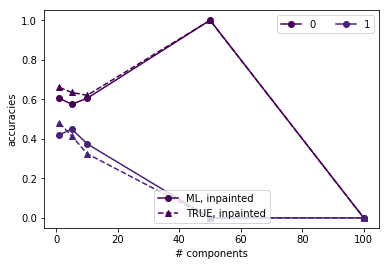

In [7]:
_=make_acc_figure(['ML','TRUE'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsTRUE_inpainted_test.png')

../outputs/Gaussian_sameR_scaling_exp_dim100_num1000/figures/MLvsPCA_inpainted_test.png


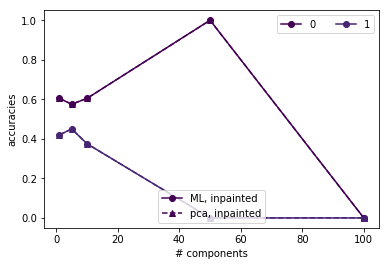

In [8]:
_= make_acc_figure(['ML','pca'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsPCA_inpainted_test.png')

../outputs/Gaussian_sameR_scaling_exp_dim100_num1000/figures/MLvsLW_inpainted_test.png


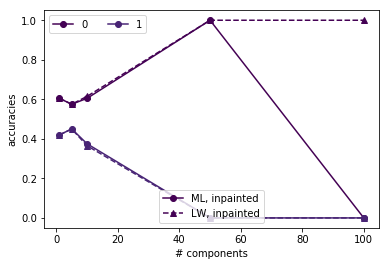

In [9]:
_= make_acc_figure(['ML','LW'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsLW_inpainted_test.png')

../outputs/Gaussian_sameR_scaling_exp_dim100_num1000/figures/LWvsNERCOME_inpainted_test.png


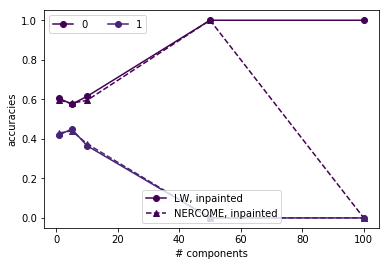

In [10]:
_= make_acc_figure(['LW','NERCOME'],['inpainted'],results,num_classes,num_comp,plotpath,'LWvsNERCOME_inpainted_test.png')

In [11]:
results = perform_classification(x_train, targets_train, modes,masks, num_classes,num_comp, inpath=covpath, outpath=outpath, pca=pca, tag='train', rerun=False)

../outputs/Gaussian_sameR_scaling_exp_dim100_num1000/classification/results_train.pkl ../outputs/Gaussian_sameR_scaling_exp_dim100_num1000/classification/
ML inpainted 1
ML inpainted 5
ML inpainted 10
ML inpainted 50
ML inpainted 100
pca 1
pca 5
pca 10
pca 50
pca 100
TRUE inpainted 1
TRUE inpainted 5
TRUE inpainted 10
TRUE inpainted 50
TRUE inpainted 100
LW inpainted 1
LW inpainted 5
LW inpainted 10
LW inpainted 50
LW inpainted 100
NERCOME inpainted 1
NERCOME inpainted 5
NERCOME inpainted 10
NERCOME inpainted 50
NERCOME inpainted 100


../outputs/Gaussian_sameR_scaling_exp_dim100_num1000/figures/MLvsTRUE_inpainted_train.png


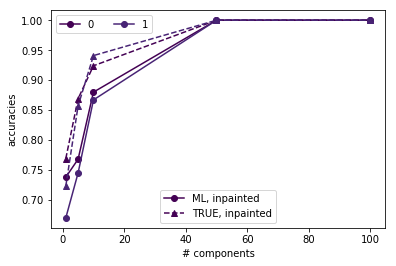

In [12]:
_=make_acc_figure(['ML','TRUE'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsTRUE_inpainted_train.png')

../outputs/Gaussian_sameR_scaling_exp_dim100_num1000/figures/NERCOMEvsLW_inpainted_train.png


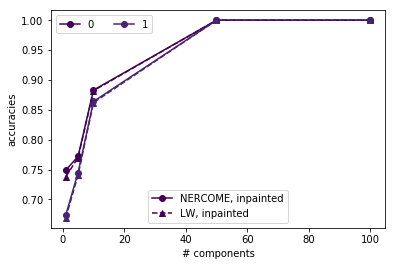

In [13]:
_=make_acc_figure(['NERCOME','LW'],['inpainted'],results,num_classes,num_comp,plotpath,'NERCOMEvsLW_inpainted_train.png')